## Data loading - RLFW
Source: http://whdeng.cn/RFW/testing.html


Make suitable for ArcFace and MagFace (112x112) and FaceNet (160x160)

### Data folder structure and metadata


In [1]:
# Load packages




# Common
import pandas as pd
import numpy as np
import os
import cv2 as cv
from IPython.display import clear_output as cls
import json

# Data
from glob import glob

# Data Visuaalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Model


### Descriptive analysis of data

#### Data concatenation

In [9]:
# ## Create dataframe

# # Define the path to the raw data directory
# raw_data_path = '../data/raw_full/' #/raw/

# # Initialize lists to store image characteristics
# img_names = []
# ethnicities = []
# face_ids = []
# id_class = []
# img_name_org_list = []
# # Iterate through the directories of each ethnicity (e.g., 'Asian')
# ethnicities_list = os.listdir(raw_data_path + 'RFW_full/data') #RLFW_mini/data
# for ethnicity in ethnicities_list:
#     ethnicity_dir = os.path.join(raw_data_path + 'RFW_full/data', ethnicity)
#     if os.path.isdir(ethnicity_dir): # indside dir
#         id_list = os.listdir(ethnicity_dir) # get ids
#         for id_name in id_list:
#             id = id_name.split('.')[1]
#             ids_dir = os.path.join(ethnicity_dir, id_name)
#             if os.path.isdir(ids_dir):
#                 for img_name in os.listdir(ids_dir):
#                     if img_name.endswith('.jpg'):
#                         # Extract information from image filename
#                         img_name_org = '.'.join(img_name.split(".")[:-1])
#                         image_name = os.path.splitext(img_name)[0]
#                         image_info = image_name.split('_')
#                         image_id = image_info[-1]

#                         # Append image characteristics to lists
#                         img_name_org_list.append(img_name_org)
#                         img_names.append(id_name)
#                         ethnicities.append(ethnicity)



# # Create a DataFrame from the lists
# data = {'image_name': img_name_org_list,'identity_name': img_names, 'ethnicity': ethnicities}
# df = pd.DataFrame(data)

# # Display the DataFrame
# print(len(df))
# df.head()

37299


,image_name,identity_name,ethnicity
0,m.010lz5_0001,m.010lz5,African
1,m.010lz5_0002,m.010lz5,African
2,m.010lz5_0003,m.010lz5,African
3,m.011y5k_0001,m.011y5k,African
4,m.011y5k_0002,m.011y5k,African


In [10]:

# df[df.im_id == "m.0h1hdn_"]

AttributeError: 'DataFrame' object has no attribute 'im_id'

In [ ]:
# df[df.im_id == "m.07b_7v"] # obs im id skal laves om til folder navn - det er det her men ikke i age_Df...

,img_name,im_id,ethnicity,id_class,face_id
16963,m.07b_7v_0001,m.07b_7v,African,07b_7v,0001
16964,m.07b_7v_0002,m.07b_7v,African,07b_7v,0002
16965,m.07b_7v_0003,m.07b_7v,African,07b_7v,0003


In [3]:
# combine
mated_adults_image_info = pd.read_csv('../../data/image_info_csvs/mated_adults_image_info.csv')
nonmated_adults_image_info = pd.read_csv('../../data/image_info_csvs/nonmated_adults_image_info.csv')

df = pd.concat([mated_adults_image_info,nonmated_adults_image_info])


In [6]:
# Check duplicates
duplicates_df = df["image_name"].duplicated()
print("number of duplicated img_names: ", duplicates_df.sum(), "\nexpample: ")
df[df.image_name == "m.02qzvw6_0002"]

number of duplicated img_names:  0 
expample: 


,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
11264,Asian_m.02qzvw6/m.02qzvw6_0002.jpg,m.02qzvw6_0002,m.02qzvw6,enrolled,Asian,37.0,m.02qzvw6,43.0,70.0,98.0,99.0


In [5]:
# Drop duplicates by last, that is how dicts are created later
df.drop_duplicates(subset=['image_name'], keep='last', inplace=True)

# Are duplciates removed?
print("length of dropped duplicates df: ", len(df), "more?: ", df["image_name"].duplicated().sum(), ", diff", 40421-40384)
# den har fjernet et af hvert navn hvilket resulterer i 37.


length of dropped duplicates df:  37264 more?:  0 , diff 37


In [7]:
df[df.image_name == "m.02qzvw6_0002"]

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
11264,Asian_m.02qzvw6/m.02qzvw6_0002.jpg,m.02qzvw6_0002,m.02qzvw6,enrolled,Asian,37.0,m.02qzvw6,43.0,70.0,98.0,99.0


In [8]:
# Check if any of the im_ids has "-"
len(df[df.identity_name.str.contains("_")])

4796

In [9]:
df.ethnicity.value_counts()

Caucasian    9494
African      9396
Indian       9358
Asian        9016
Name: ethnicity, dtype: int64

In [10]:
# Check if any of the names has double "__"
len(df[df.identity_name.str.contains("_")])

4796

In [11]:
len(df)

37264

In [12]:
df.head()

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar
0,African_m.010lz5/m.010lz5_0001.jpg,m.010lz5_0001,m.010lz5,enrolled,African,38.0,m.010lz5,35.0,100.0,100.0,100.0
1,African_m.010lz5/m.010lz5_0002.jpg,m.010lz5_0002,m.010lz5,enrolled,African,29.0,m.010lz5,40.0,76.0,81.0,97.0
2,African_m.010lz5/m.010lz5_0003.jpg,m.010lz5_0003,m.010lz5,enrolled,African,37.0,m.010lz5,34.0,99.0,76.0,100.0
3,African_m.011y5k/m.011y5k_0001.jpg,m.011y5k_0001,m.011y5k,enrolled,African,40.0,m.011y5k,5.0,90.0,100.0,100.0
4,African_m.011y5k/m.011y5k_0002.jpg,m.011y5k_0002,m.011y5k,enrolled,African,43.0,m.011y5k,51.0,100.0,100.0,100.0


In [32]:
# raw_data_path = '/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data/age_estimations/data sendt fra Gabi senest/'
# data_dict = {}

# for ethnicity_age in os.listdir(raw_data_path):
#     if ethnicity_age.endswith('.json'):
#         with open( raw_data_path + ethnicity_age, 'r') as file:
#             json_data = json.load(file)
#             data_dict.update(json_data)

#             #check for uniqueness
#             unique_keys = list(json_data.keys())
#             num_unique_keys = len(set(unique_keys))
#             #print("ids",num_unique_keys, 'len', len(unique_keys), "len dict", len(json_data))

# # Convert the JSON data to a DataFrame: if duplicates only the last occurence of the key is kept (python dict rules)
# age_df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Age'])
# print("df length: ",len(age_df)) #11416
# # Convert the 'Age' column to numeric
# age_df['Age'] = pd.to_numeric(age_df['Age'])
# age_df.reset_index(inplace=True)
# age_df.columns = ['image_name', 'Age']

# # convert from m.02q26w2_0001 to m.02q26w2
# age_df["identity_name"] = age_df.image_name.apply(lambda x: x[:-5])
# age_df.head()

df length:  40570


,image_name,Age,identity_name
0,m.0h1hdn__0003,29.0,m.0h1hdn_
1,m.04tnlr_0002,41.0,m.04tnlr
2,m.0fz9yq_0001,25.0,m.0fz9yq
3,m.07l2fk_0003,19.0,m.07l2fk
4,m.0285_b0_0001,24.0,m.0285_b0


In [33]:
# age_df[age_df.identity_name == "m.07b"]  #obs forskellige im_id her !

,image_name,Age,identity_name


In [34]:
# age_df[age_df.identity_name == "m.07b_7v"]

,image_name,Age,identity_name
144,m.07b_7v_0003,NaN,m.07b_7v
5163,m.07b_7v_0002,27.0,m.07b_7v
9349,m.07b_7v_0001,29.0,m.07b_7v


In [35]:
# age_df[age_df.image_name == "m.02qzvw6_0002"] #asian

,image_name,Age,identity_name
1430,m.02qzvw6_0002,37.0,m.02qzvw6


In [36]:
# Check for duplicates
# print("duplicates: ", age_df["image_name"].duplicated().sum())

duplicates:  0


In [37]:
# Null values, drop these:
# age_df[age_df.isnull().any(axis=1)]

,image_name,Age,identity_name
64,m.0r8m3s4_0003,NaN,m.0r8m3s4
67,m.05p1jm0_0003,NaN,m.05p1jm0
137,m.026fkt_0003,NaN,m.026fkt
144,m.07b_7v_0003,NaN,m.07b_7v
169,m.061sf6_0001,NaN,m.061sf6
...,...,...,...
39022,m.0nbtgyj_0003,NaN,m.0nbtgyj
39385,m.08hsy__0003,NaN,m.08hsy_
39534,m.0gy3f_0003,NaN,m.0gy3f
39991,m.0b_x6f5_0002,NaN,m.0b_x6f5


In [38]:
# # Drop null values
# age_df = age_df.dropna()
# print("len of dropped df: ",len(age_df), 40570-159)

len of dropped df:  40411 40411


In [39]:
#print("RESULTING DF should be with n rows: ", len(age_df))

In [41]:
age_df

,image_name,Age,identity_name
0,m.0h1hdn__0003,29.0,m.0h1hdn_
1,m.04tnlr_0002,41.0,m.04tnlr
2,m.0fz9yq_0001,25.0,m.0fz9yq
3,m.07l2fk_0003,19.0,m.07l2fk
4,m.0285_b0_0001,24.0,m.0285_b0
...,...,...,...
40565,m.060dvc_0003,38.0,m.060dvc
40566,m.026zcm5_0001,48.0,m.026zcm5
40567,m.03phng_0002,67.0,m.03phng
40568,m.05l4xs_0004,40.0,m.05l4xs


In [42]:
# Check if some values in df1['name'] are not equal to values in df2['name']
# not_equal_values = age_df['img_name'] != df['img_name']

# # Check if any value is not equal
# if not_equal_values.any():
#     print("Some values in df1['name'] are not equal to values in df2['name']")
# else:
#     print("All values in df1['name'] are equal to values in df2['name']")

In [43]:
# # Convert the 'name' columns to sets
# set1 = set(age_df['image_name'])
# set2 = set(df['image_name'])

# # Find the values in set1 that are not in set2
# values_not_in_df2 = set1 - set2

# # Find the values in set2 that are not in set1 (optional)
# values_not_in_df1 = set2 - set1

# # Print the values
# print("Values in df1['name'] that are not in df2['name']: ", values_not_in_df2)
# print("Values in df2['name'] that are not in df1['name']: ", values_not_in_df1)

Values in df1['name'] that are not in df2['name']:  {'m.0hr105c_0001', 'm.026syhg_0001', 'm.02623yx_0003', 'm.0gd19__0001', 'm.044js_0004', 'm.02q830y_0001', 'm.0503zz_0001', 'm.0fhh_y_0001', 'm.0b8zyp_0001', 'm.0fgt4f_0003', 'm.06_plk_0002', 'm.0frqbb_0003', 'm.072qwy_0001', 'm.01ng51t_0002', 'm.076yd1t_0003', 'm.0glrzqp_0001', 'm.0k9bjtn_0002', 'm.01p4n57_0005', 'm.0cz9bfj_0002', 'm.0569p__0003', 'm.0jt455v_0003', 'm.05mz553_0001', 'm.08hhqd_0002', 'm.02psh0n_0003', 'm.0df4rv_0003', 'm.06znxl0_0003', 'm.0gg1p1_0003', 'm.0bc2pk_0001', 'm.0275xcm_0003', 'm.02vldwh_0003', 'm.06wblfx_0002', 'm.01yjy0_0002', 'm.06w5svb_0002', 'm.027h0r_0004', 'm.0fqc0sl_0002', 'm.06s27s_0002', 'm.064l65f_0003', 'm.05mk6s_0002', 'm.04m_0r7_0003', 'm.043j1t_0005', 'm.0j_711k_0003', 'm.0552l1r_0003', 'm.05b9z__0001', 'm.03c62bf_0002', 'm.0g1w23_0004', 'm.0sgqn1h_0004', 'm.02w4t9m_0002', 'm.0h5m26_0003', 'm.04q699_0001', 'm.0339tj_0002', 'm.0dhmzw_0001', 'm.0fnz3z_0001', 'm.0809m8q_0002', 'm.0py1j36_0003', 'm

In [44]:
# Concatenate dataframes based on age_df
#final_df = df.merge(age_df.drop("im_id", axis=1), on='img_name')
final_df = pd.merge(df, age_df[['image_name', 'Age']], on='image_name', how='left')

# Filter out rows where 'age' is not null
final_df = final_df.dropna()
print("final_df rows", len(final_df) )
final_df.head()

#40411


final_df rows 37105


,image_name,identity_name,ethnicity,Age
0,m.010lz5_0001,m.010lz5,African,38.0
1,m.010lz5_0002,m.010lz5,African,29.0
2,m.010lz5_0003,m.010lz5,African,37.0
3,m.011y5k_0001,m.011y5k,African,40.0
4,m.011y5k_0002,m.011y5k,African,43.0


In [13]:
len(df)

37264

In [46]:
final_df.image_name.duplicated().sum()

0

In [14]:
final_df = df

In [16]:
print(len(final_df))
final_df.dropna(inplace=True)
print("len of final df",len(final_df))

37264
len of final df 36407


In [17]:
# Ensure 'Age' is of type integer
final_df['Age'] = final_df['Age'].astype(int)

# Define the age groups and corresponding labels
age_bins = [1, 4, 7, 10, 13, 16]
age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Update the DataFrame with age groupings
final_df['children_agegroup'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)


In [27]:
final_df[final_df.Age == 20]

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
23,African_m.012mh_/m.012mh__0003.jpg,m.012mh__0003,m.012mh_,enrolled,African,20,m.012mh_,14.0,75.0,97.0,99.0,NaN
157,African_m.01k358/m.01k358_0002.jpg,m.01k358_0002,m.01k358,enrolled,African,20,m.01k358,65.0,100.0,85.0,100.0,NaN
213,African_m.01kys2/m.01kys2_0001.jpg,m.01kys2_0001,m.01kys2,enrolled,African,20,m.01kys2,12.0,97.0,96.0,100.0,NaN
754,African_m.01xdx6/m.01xdx6_0004.jpg,m.01xdx6_0004,m.01xdx6,enrolled,African,20,m.01xdx6,17.0,100.0,98.0,100.0,NaN
827,African_m.025wtny/m.025wtny_0003.jpg,m.025wtny_0003,m.025wtny,enrolled,African,20,m.025wtny,20.0,100.0,100.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36801,Indian_m.0m0mh6j/m.0m0mh6j_0002.jpg,m.0m0mh6j_0002,m.0m0mh6j,enrolled,Indian,20,m.0m0mh6j,65.0,93.0,96.0,99.0,NaN
36879,Indian_m.0n9w20d/m.0n9w20d_0004.jpg,m.0n9w20d_0004,m.0n9w20d,enrolled,Indian,20,m.0n9w20d,15.0,81.0,94.0,100.0,NaN
37076,Indian_m.0t_d791/m.0t_d791_0002.jpg,m.0t_d791_0002,m.0t_d791,enrolled,Indian,20,m.0t_d791,17.0,77.0,98.0,99.0,NaN
74,African_m.0g1y3z/m.0g1y3z_0001.jpg,m.0g1y3z_0001,m.0g1y3z,non_enrolled,African,20,m.0g1y3z,48.0,100.0,100.0,100.0,NaN


### Save df

In [29]:
final_df.to_csv('../../data/image_info_csvs/RFW_full_info_excluding_children.csv', index=False)

## saving excluding children

In [36]:
final_df_ex_children = final_df[final_df.Age >= 20]

In [40]:
final_df_ex_children[final_df_ex_children.Age == 20]

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
23,African_m.012mh_/m.012mh__0003.jpg,m.012mh__0003,m.012mh_,enrolled,African,20,m.012mh_,14.0,75.0,97.0,99.0,NaN
157,African_m.01k358/m.01k358_0002.jpg,m.01k358_0002,m.01k358,enrolled,African,20,m.01k358,65.0,100.0,85.0,100.0,NaN
213,African_m.01kys2/m.01kys2_0001.jpg,m.01kys2_0001,m.01kys2,enrolled,African,20,m.01kys2,12.0,97.0,96.0,100.0,NaN
754,African_m.01xdx6/m.01xdx6_0004.jpg,m.01xdx6_0004,m.01xdx6,enrolled,African,20,m.01xdx6,17.0,100.0,98.0,100.0,NaN
827,African_m.025wtny/m.025wtny_0003.jpg,m.025wtny_0003,m.025wtny,enrolled,African,20,m.025wtny,20.0,100.0,100.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
36801,Indian_m.0m0mh6j/m.0m0mh6j_0002.jpg,m.0m0mh6j_0002,m.0m0mh6j,enrolled,Indian,20,m.0m0mh6j,65.0,93.0,96.0,99.0,NaN
36879,Indian_m.0n9w20d/m.0n9w20d_0004.jpg,m.0n9w20d_0004,m.0n9w20d,enrolled,Indian,20,m.0n9w20d,15.0,81.0,94.0,100.0,NaN
37076,Indian_m.0t_d791/m.0t_d791_0002.jpg,m.0t_d791_0002,m.0t_d791,enrolled,Indian,20,m.0t_d791,17.0,77.0,98.0,99.0,NaN
74,African_m.0g1y3z/m.0g1y3z_0001.jpg,m.0g1y3z_0001,m.0g1y3z,non_enrolled,African,20,m.0g1y3z,48.0,100.0,100.0,100.0,NaN


In [41]:
final_df_ex_children.to_csv('../../data/image_info_csvs/RFW_full_info_excluding_children.csv', index=False)

#### Data distributions
(Evt efter age groups)

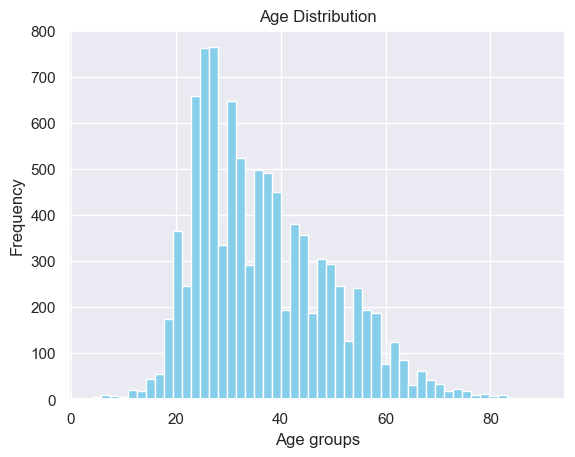

In [8]:
# Define bin edges for each group of 3 years
plt.hist(age_df['Age'], bins=50, color='skyblue')
plt.xlabel('Age groups')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
